In [8]:
import src
import os
import numpy as np
import sys
import re
import math
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0, 'C:/Users/pkicsiny/Desktop/TUM/3/ADL4CV/ADL4CV_project/models')

In [9]:
os.listdir(sys.path[0])

['sgan_2-1',
 'sgan_2-1_iw',
 'sgan_2-1_w',
 'tgan_2-1',
 'tgan_2-1_iw',
 'unet_2-1']

In [10]:
scores = {}
for model in os.listdir(sys.path[0]):
    try:
        scores[model] = np.load(sys.path[0]+"/"+model+"/"+model+"_scores.npy")
    except:
        pass

In [11]:
scores.keys()

dict_keys(['sgan_2-1', 'sgan_2-1_iw', 'sgan_2-1_w', 'tgan_2-1', 'tgan_2-1_iw', 'unet_2-1'])

In [12]:
result = {}
for model in scores.keys():
    result[model] = pd.DataFrame(
        data=[pd.DataFrame(scores[model].item()[key]).mean() for key in scores[model].item().keys()],
        index=scores[model].item().keys())#.groupby(['corr_to_input', 'corr_to_truth'])

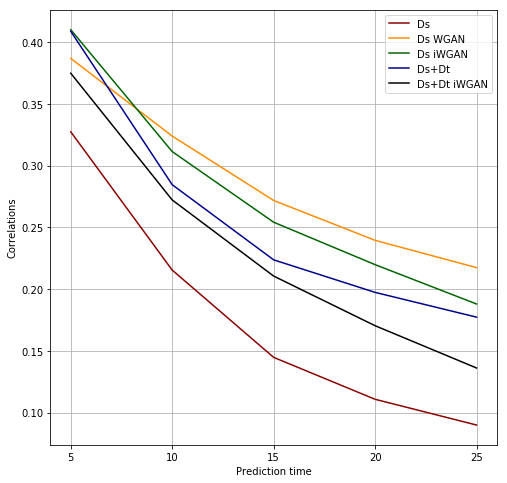

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
#ax1.plot(result["sgan_2-1"]["corr_to_input"], label="Ds", linestyle='--',c="r")
ax1.plot(result["sgan_2-1"]["corr_to_truth"], label="Ds", c="darkred")

#ax1.plot(result["sgan_2-1_w"]["corr_to_input"], label="Ds WGAN", linestyle='--',c="orange")
ax1.plot(result["sgan_2-1_w"]["corr_to_truth"], label="Ds WGAN", c="darkorange")

#ax1.plot(result["sgan_2-1_iw"]["corr_to_input"], label="Ds iWGAN", linestyle='--',c="g")
ax1.plot(result["sgan_2-1_iw"]["corr_to_truth"], label="Ds iWGAN", c="darkgreen")

#ax1.plot(result["tgan_2-1"]["corr_to_input"], label="Ds+Dt", linestyle='--',c="b")
ax1.plot(result["tgan_2-1"]["corr_to_truth"], label="Ds+Dt", c="darkblue")

#ax1.plot(result["tgan_2-1_iw"]["corr_to_input"], label="Ds+Dt iWGAN", linestyle='--',c="k")
ax1.plot(result["tgan_2-1_iw"]["corr_to_truth"], label="Ds+Dt iWGAN", c="black")
ax1.grid()
ax1.set_xticklabels(["5", "10", "15", "20", "25"])
ax1.set_xlabel("Prediction time")
ax1.set_ylabel("Correlations")
ax1.legend(loc="upper right")
#plt.savefig("corrs")

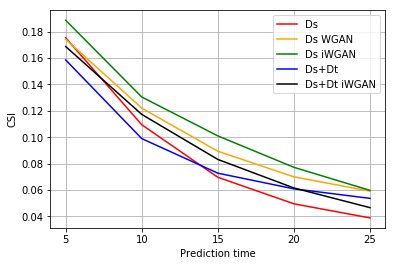

In [15]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"]["csi"], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"]["csi"], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"]["csi"], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"]["csi"], label="Ds+Dt",c="b")
ax2.plot(result["tgan_2-1_iw"]["csi"], label="Ds+Dt iWGAN",c="k")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("CSI")
ax2.grid()
ax2.set_xticklabels(["5", "10", "15", "20", "25"])
ax2.legend()
plt.savefig("csi")

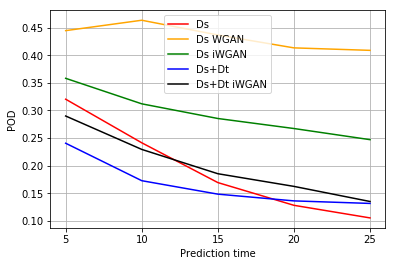

In [16]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"]["pod"], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"]["pod"], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"]["pod"], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"]["pod"], label="Ds+Dt",c="b")
ax2.plot(result["tgan_2-1_iw"]["pod"], label="Ds+Dt iWGAN",c="k")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("POD")
ax2.grid()
ax2.set_xticklabels(["5", "10", "15", "20", "25"])
ax2.legend()
plt.savefig("pod")

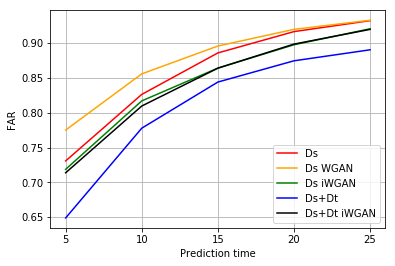

In [17]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"]["far"], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"]["far"], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"]["far"], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"]["far"], label="Ds+Dt",c="b")
ax2.plot(result["tgan_2-1_iw"]["far"], label="Ds+Dt iWGAN",c="k")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("FAR")
ax2.grid()
ax2.set_xticklabels(["5", "10", "15", "20", "25"])
ax2.legend()
plt.savefig("far")